In [203]:
import pandas as pd
import numpy as np
import seaborn as sns

# replace this with your own file path in your own file system
path = r"C:\steeldata2025\sulatto_sample2025.csv"
df = pd.read_csv(path, delimiter=";")

In [204]:
df.columns

Index(['Material Name', 'Material Type', 'End time', 'Route', 'Weight',
       'Length', 'Thickness', 'Width', 'Grade', 'Quality Status', 'Seg No',
       'Seg from', 'Seg to', 'CCM.TD. Heat counter Value',
       'CCM.TD. Temperature liquidus Value',
       'CCM.TD. Temperature liquidus Dynaphase Value',
       'CCM.TD. TD internals type Value', 'CCM.TD. Slag powder Value',
       'CCM.TD. Stopper Type Value', 'CCM.TD. Steel weight in tundish Value',
       'CCM.TD. Tundish inflow Value', 'CCM.TD. Stopper Last Position Value',
       'CCM.TD. Stopper position max Value',
       'CCM.TD. Stopper position min Value',
       'CCM.TD. Stopper pos chg max segment Value',
       'CCM.TD. Stopper position chg 10 s Value',
       'CCM.TD. Stopper position slab chg Value', 'CCM.TD. Superheat Value',
       'CCM.TD. Temperature tundish Value', 'CCM.SEN. SEN Type Value',
       'CCM.SEN. Immersion depth Value', 'CCM.MD. Level average Value',
       'CCM.MD. Level change (max-min) Value', 'CCM.MD

In [205]:
df.describe()

,Material Name,Weight,Width,Seg No,CCM.TD. Heat counter Value,CCM.TD. Temperature liquidus Value,CCM.TD. Temperature liquidus Dynaphase Value,CCM.TD. Superheat Value,CCM.TD. Temperature tundish Value,CCM.SEN. Immersion depth Value,CCM.MD. Mold width Value,CCM.SLAB. Slab counter heat Value,CCM.SLAB. Slab counter sequence Value
count,1457.000000,1457.000000,1457.000000,1457.000000,946.000000,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,16.044612,56997.533974,1273.914207,128.595058,7.509514,1455.0,1459.188161,36.297040,1491.297040,161.107822,1130.723044,4.896406,52.471459
std,2.993824,49032.584273,218.211959,131.074011,0.500174,0.0,1.361802,7.483564,7.483564,2.928965,121.824062,1.888940,2.766338
min,13.000000,18752.000000,1034.000000,1.000000,7.000000,1455.0,1456.000000,19.000000,1474.000000,157.000000,1034.000000,2.000000,49.000000
25%,13.000000,18762.000000,1034.000000,41.000000,7.000000,1455.0,1459.000000,35.000000,1490.000000,160.000000,1034.000000,4.000000,51.000000
50%,15.000000,23259.000000,1284.000000,81.000000,8.000000,1455.0,1460.000000,41.000000,1496.000000,160.000000,1034.000000,5.000000,51.000000
75%,19.000000,123605.000000,1539.000000,147.000000,8.000000,1455.0,1460.000000,42.000000,1497.000000,160.000000,1284.000000,6.000000,54.000000
max,21.000000,123605.000000,1539.000000,511.000000,8.000000,1455.0,1460.000000,43.000000,1498.000000,166.000000,1284.000000,8.000000,58.000000


In [206]:
# since everything has the same type => drop this column
# (no new information regarding the data)
df['Material Type'].value_counts()

Material Type
slab    1457
Name: count, dtype: int64

In [207]:
df['Route'].value_counts()

Route
Route 1    1457
Name: count, dtype: int64

In [208]:
df['Quality Status'].value_counts()

Quality Status
OK    1457
Name: count, dtype: int64

### Preliminary preprocessing -> we need to replace the original commas separators with periods => float numbers

In [209]:
# let's collect all numeric columns that need their commas converted to period => float number
fixables = ["Length", 
            "Thickness",
            'CCM.TD. Steel weight in tundish Value',
            'CCM.TD. Tundish inflow Value', 'CCM.TD. Stopper Last Position Value',
            'CCM.TD. Stopper position max Value',
            'CCM.TD. Stopper position min Value',
            'CCM.TD. Stopper pos chg max segment Value',
            'CCM.TD. Stopper position chg 10 s Value',
            'CCM.TD. Stopper position slab chg Value', 
            'CCM.MD. Level average Value',
            'CCM.MD. Level change (max-min) Value', 'CCM.MD. Level std_dev Value',
            'CCM.MD. Level std_dev west Value', 'CCM.MD. Level std_dev east Value',
            'CCM.MIX. Concentration factor Value',
            'CCM.STR. Speed - Mold avg Value', 'CCM.STR. Throughput Value'
            ]

# brute force and change datatype for each of thecolumns
for column_name in fixables:
    df[column_name] = df[column_name].astype(str).replace(regex=",", value=".")
    df[column_name] = df[column_name].astype(float)

In [210]:
# import dtale 
# dtale.show(df).open_browser()

In [211]:
# how many unique slabs do we have in this data
df['Material Name'].value_counts()

Material Name
13    511
21    250
15    116
14    116
16    116
17    116
18    116
19    116
Name: count, dtype: int64

## This is where our visualization data pipeline starts

In [212]:
# STEP 1: filter only one slab for visualization
df_single = df[df['Material Name'] == 21]

In [213]:
df_single

,Material Name,Material Type,End time,Route,Weight,Length,Thickness,Width,Grade,Quality Status,...,CCM.MD. Level change (max-min) Value,CCM.MD. Level std_dev Value,CCM.MD. Level std_dev west Value,CCM.MD. Level std_dev east Value,CCM.MD. Mold width Value,CCM.MIX. Concentration factor Value,CCM.STR. Speed - Mold avg Value,CCM.STR. Throughput Value,CCM.SLAB. Slab counter heat Value,CCM.SLAB. Slab counter sequence Value
1207,21,slab,2023-04-14 21:28:32,Route 1,23243,11.51,202.0,1284,720-1,OK,...,2.9,0.9,1.3,1.4,1284.0,0.0,1.4,2.79,4.0,50.0
1208,21,slab,2023-04-14 21:28:32,Route 1,23243,11.51,202.0,1284,720-1,OK,...,2.9,0.9,1.3,1.4,1284.0,0.0,1.4,2.79,4.0,50.0
1209,21,slab,2023-04-14 21:28:32,Route 1,23243,11.51,202.0,1284,720-1,OK,...,2.9,0.9,1.3,1.4,1284.0,0.0,1.4,2.79,4.0,50.0
1210,21,slab,2023-04-14 21:28:32,Route 1,23243,11.51,202.0,1284,720-1,OK,...,2.9,0.9,1.3,1.4,1284.0,0.0,1.4,2.79,4.0,50.0
1211,21,slab,2023-04-14 21:28:32,Route 1,23243,11.51,202.0,1284,720-1,OK,...,2.9,0.9,1.3,1.4,1284.0,0.0,1.4,2.79,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,21,slab,2023-04-28 19:02:42,Route 1,26940,13.33,202.0,1284,725-A,OK,...,5.1,1.3,1.9,1.9,1284.0,0.0,1.4,2.79,6.0,51.0
1453,21,slab,2023-04-28 19:02:42,Route 1,26940,13.33,202.0,1284,725-A,OK,...,5.1,1.3,1.9,1.9,1284.0,0.0,1.4,2.79,6.0,51.0
1454,21,slab,2023-04-28 19:02:42,Route 1,26940,13.33,202.0,1284,725-A,OK,...,5.1,1.2,1.9,1.9,1284.0,0.0,1.4,2.78,6.0,51.0
1455,21,slab,2023-04-28 19:02:42,Route 1,26940,13.33,202.0,1284,725-A,OK,...,5.1,1.2,1.9,1.9,1284.0,0.0,1.4,2.78,6.0,51.0


In [214]:
df.columns

Index(['Material Name', 'Material Type', 'End time', 'Route', 'Weight',
       'Length', 'Thickness', 'Width', 'Grade', 'Quality Status', 'Seg No',
       'Seg from', 'Seg to', 'CCM.TD. Heat counter Value',
       'CCM.TD. Temperature liquidus Value',
       'CCM.TD. Temperature liquidus Dynaphase Value',
       'CCM.TD. TD internals type Value', 'CCM.TD. Slag powder Value',
       'CCM.TD. Stopper Type Value', 'CCM.TD. Steel weight in tundish Value',
       'CCM.TD. Tundish inflow Value', 'CCM.TD. Stopper Last Position Value',
       'CCM.TD. Stopper position max Value',
       'CCM.TD. Stopper position min Value',
       'CCM.TD. Stopper pos chg max segment Value',
       'CCM.TD. Stopper position chg 10 s Value',
       'CCM.TD. Stopper position slab chg Value', 'CCM.TD. Superheat Value',
       'CCM.TD. Temperature tundish Value', 'CCM.SEN. SEN Type Value',
       'CCM.SEN. Immersion depth Value', 'CCM.MD. Level average Value',
       'CCM.MD. Level change (max-min) Value', 'CCM.MD

In [215]:
# we are going to use multi-line charts + df.melt() to visualize the process better
# see "ricebeefcoffee_revisited.ipynb" from lecture 9 examples on how to work
# with multiline + df.melt()

# list all columns you want to see in the multiline chart
columns_all = [
       'Length', 'Thickness', 'Width', 'Seg No',
       'CCM.TD. Heat counter Value',
       'CCM.TD. Temperature liquidus Value',
       'CCM.TD. Temperature liquidus Dynaphase Value',
       'CCM.TD. Steel weight in tundish Value',
       'CCM.TD. Tundish inflow Value', 'CCM.TD. Stopper Last Position Value',
       'CCM.TD. Stopper position max Value',
       'CCM.TD. Stopper position min Value',
       'CCM.TD. Stopper pos chg max segment Value',
       'CCM.TD. Stopper position chg 10 s Value',
       'CCM.TD. Stopper position slab chg Value', 'CCM.TD. Superheat Value',
       'CCM.TD. Temperature tundish Value', 
       'CCM.SEN. Immersion depth Value', 'CCM.MD. Level average Value',
       'CCM.MD. Level change (max-min) Value', 'CCM.MD. Level std_dev Value',
       'CCM.MD. Level std_dev west Value', 'CCM.MD. Level std_dev east Value',
       'CCM.MD. Mold width Value', 'CCM.MIX. Concentration factor Value',
       'CCM.STR. Speed - Mold avg Value', 'CCM.STR. Throughput Value',
       'CCM.SLAB. Slab counter heat Value',
       'CCM.SLAB. Slab counter sequence Value']

columns_high = ['Weight']

columns_middle = ['CCM.TD. Stopper Last Position Value',
       'CCM.TD. Stopper position max Value',
       'CCM.TD. Stopper position min Value',
       'CCM.TD. Steel weight in tundish Value',]

columns_low = ['CCM.TD. Tundish inflow Value',
                'CCM.MD. Level change (max-min) Value', 'CCM.MD. Level std_dev Value',
       'CCM.MD. Level std_dev west Value', 'CCM.MD. Level std_dev east Value', 'CCM.MIX. Concentration factor Value',
       'CCM.STR. Speed - Mold avg Value', 'CCM.STR. Throughput Value',]

In [216]:
# convert the data from original DataFrame into melt-version (long version)
df_melt_middle = pd.melt(df_single, id_vars=["Seg No"], value_vars=columns_middle,
                  var_name="Measurement", value_name="Value")

In [217]:
df_melt_middle

,Seg No,Measurement,Value
0,1,CCM.TD. Stopper Last Position Value,66.5
1,2,CCM.TD. Stopper Last Position Value,66.5
2,3,CCM.TD. Stopper Last Position Value,66.4
3,4,CCM.TD. Stopper Last Position Value,66.4
4,5,CCM.TD. Stopper Last Position Value,66.4
...,...,...,...
995,130,CCM.TD. Steel weight in tundish Value,16.3
996,131,CCM.TD. Steel weight in tundish Value,16.1
997,132,CCM.TD. Steel weight in tundish Value,15.9
998,133,CCM.TD. Steel weight in tundish Value,15.9


C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_2632\2758694663.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




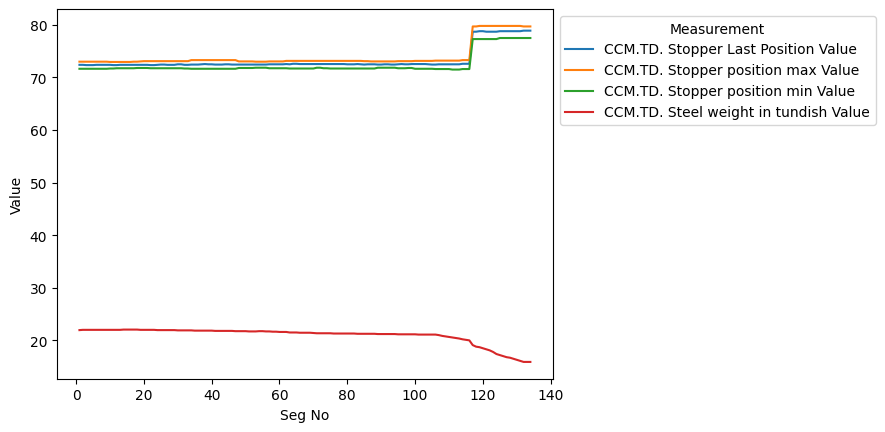

In [218]:
plot = sns.lineplot(data=df_melt_middle, x="Seg No", y="Value", hue="Measurement", ci=None)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))

In [219]:
# convert the data from original DataFrame into melt-version (long version)
df_melt_low = pd.melt(df_single, id_vars=["Seg No"], value_vars=columns_low,
                  var_name="Measurement", value_name="Value")

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_2632\2406766303.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




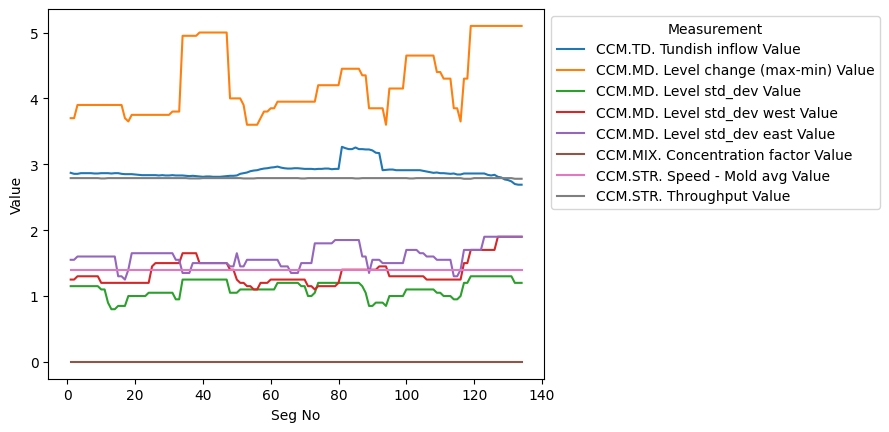

In [220]:
plot = sns.lineplot(data=df_melt_low, x="Seg No", y="Value", hue="Measurement", ci=None)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))